# Data Analyst Nanodegree

## Project 3: Data Visualization

### Wassim Askoul

### 02/28/2019

In [1]:
#import relevant liberaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

%matplotlib inline

##### Introduction

This report is the exploratory part of a data visualization project. The report explores the PISA 2012 dataset that can be found [here](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisa2012.csv.zip&sa=D&ust=1551376898573000). Since the PISA 2012 dataset is a complex huge dataset, this report is going to focus on specific variables related to the evaluation of the mathematics level of students in three countries: Finland, United Arab Emirates, and Unites States of America.

In [3]:
df = pd.read_csv('pisa2012.csv', encoding='latin-1');
df.head()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


In [4]:
df.reset_index(inplace=True, drop=True)
df.drop(columns='Unnamed: 0', inplace=True)

In [5]:
df.head()

,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,2,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,2,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,9,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,8,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,10,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


In [6]:
#df_cur is the curated dataframe that is the interest of the whole PISA 2012 dataset
df_cur = df.query('CNT == "Finland" or CNT == "United Arab Emirates" or CNT == "United States of America"')

In [7]:
#These are the variables that this report will focus on
df_cur = df_cur.loc[:,['CNT', 'ST04Q01', 'ST29Q04', 'ST35Q06', 'WEALTH', 'ANCCLSMAN', 'ANCCOGACT', 'ANCSTUDREL', 'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH','PV5MATH']]

In [8]:
df_cur.reset_index(drop=True, inplace=True)
df_cur.head()

,CNT,ST04Q01,ST29Q04,ST35Q06,WEALTH,ANCCLSMAN,ANCCOGACT,ANCSTUDREL,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH
0,United Arab Emirates,Male,Disagree,Agree,-1.06,-0.2370,-0.1278,-0.3303,328.2521,386.6724,341.4940,336.0414,316.5680
1,United Arab Emirates,Male,NaN,NaN,0.67,-0.9781,3.4603,NaN,270.7665,193.6517,267.6507,255.1877,246.6194
2,United Arab Emirates,Male,NaN,NaN,-0.14,-0.5455,-0.6230,-0.8079,314.9322,297.7956,259.6277,272.0907,323.5005
3,United Arab Emirates,Male,NaN,NaN,2.76,NaN,NaN,NaN,250.2804,233.1438,223.7965,254.9540,295.4588
4,United Arab Emirates,Male,Strongly agree,Agree,-0.84,-0.9781,3.4603,-0.8079,310.1807,313.2965,313.2965,279.8021,299.2756


In [9]:
df_cur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25307 entries, 0 to 25306
Data columns (total 13 columns):
CNT           25307 non-null object
ST04Q01       25307 non-null object
ST29Q04       16472 non-null object
ST35Q06       16412 non-null object
WEALTH        25084 non-null float64
ANCCLSMAN     16020 non-null float64
ANCCOGACT     16009 non-null float64
ANCSTUDREL    15962 non-null float64
PV1MATH       25307 non-null float64
PV2MATH       25307 non-null float64
PV3MATH       25307 non-null float64
PV4MATH       25307 non-null float64
PV5MATH       25307 non-null float64
dtypes: float64(9), object(4)
memory usage: 2.5+ MB


In [10]:
#Dropping missing values for a full clean dataset
df_cur.dropna(inplace=True)
df_cur.reset_index(drop=True, inplace=True)
df_cur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7897 entries, 0 to 7896
Data columns (total 13 columns):
CNT           7897 non-null object
ST04Q01       7897 non-null object
ST29Q04       7897 non-null object
ST35Q06       7897 non-null object
WEALTH        7897 non-null float64
ANCCLSMAN     7897 non-null float64
ANCCOGACT     7897 non-null float64
ANCSTUDREL    7897 non-null float64
PV1MATH       7897 non-null float64
PV2MATH       7897 non-null float64
PV3MATH       7897 non-null float64
PV4MATH       7897 non-null float64
PV5MATH       7897 non-null float64
dtypes: float64(9), object(4)
memory usage: 802.1+ KB


In [11]:
#No duplicated data
sum(df_cur.duplicated())

0

In [12]:
#Renaming varibales for easier usage throughout the report
df_cur.rename(index=str, columns={"CNT": "COUNTRY", "ST04Q01": "GENDER", "ST29Q04": "ENJMATH", "ST35Q06": "PARENJMATH", "ANCCLSMAN": "TEACHERCLASSMANAG", "ANCCOGACT": "COGNITIVEACTIV", "ANCSTUDREL": "TEACHSTUDRELAT"}, inplace=True)
df_cur.head()

,COUNTRY,GENDER,ENJMATH,PARENJMATH,WEALTH,TEACHERCLASSMANAG,COGNITIVEACTIV,TEACHSTUDRELAT,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH
0,United Arab Emirates,Male,Disagree,Agree,-1.06,-0.2370,-0.1278,-0.3303,328.2521,386.6724,341.4940,336.0414,316.5680
1,United Arab Emirates,Male,Strongly agree,Agree,-0.84,-0.9781,3.4603,-0.8079,310.1807,313.2965,313.2965,279.8021,299.2756
2,United Arab Emirates,Male,Agree,Disagree,-0.61,2.9734,0.4736,-0.1113,413.8573,424.7624,449.6884,398.2785,424.7624
3,United Arab Emirates,Male,Disagree,Agree,3.09,-2.8224,-2.9882,-1.6365,300.2882,298.7303,305.7408,313.5301,304.9618
4,United Arab Emirates,Male,Strongly disagree,Strongly agree,0.37,-0.0983,0.3058,-0.5138,367.5105,404.1206,378.4156,385.4261,414.2468


In [13]:
df_cur.describe()

,WEALTH,TEACHERCLASSMANAG,COGNITIVEACTIV,TEACHSTUDRELAT,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH
count,7897.000000,7897.000000,7897.000000,7897.000000,7897.000000,7897.000000,7897.000000,7897.000000,7897.000000
mean,0.436933,0.026161,0.159506,0.064578,472.625320,472.513170,472.341343,472.357914,472.502121
std,1.115146,0.960155,0.959404,0.952450,94.239383,94.384743,94.442054,94.581322,94.141613
min,-4.770000,-2.822400,-3.067400,-2.665800,167.635100,175.112900,180.331800,169.193000,103.995900
25%,-0.380000,-0.306900,-0.091300,-0.330300,406.067900,404.354300,404.432200,404.354300,405.289000
50%,0.370000,0.134600,0.305800,0.159300,470.018700,470.096600,469.940800,469.395500,469.862900
75%,1.000000,0.484000,0.590000,0.620900,538.097800,537.786300,537.085200,537.552600,536.929400
max,3.090000,2.973400,3.460300,2.821100,861.668500,768.974900,804.027100,793.122000,779.880000


A bit of explanation of the variables used:
   - COUNTRY: 3 countries (Finland, United Arab Emirates, United States of America)
   - GENDER: 2 genders (Female, Male)
   - ENJMATH: answers to "Do you (the student) enjoy mathematics?" 4 answers (Strongly disagree, Disagree, Agree, Strongly agree)
   - PARENJMATH: answers to "Do your parents (the student's parents) enjoy mathematics?" 4 answers (Strongly disagree, Disagree, Agree, Strongly agree)
   - WEALTH: a float that is calculated by number of questions in the PISA 2012 dataset to measure wealth of the family of the student
   - TEACHERCLASSMANAG: a float that is calculated by number of questions in the PISA 2012 dataset to measure class management by the teacher
   - COGNITIVEACTIV: a float that is calculated by number of questions in the PISA 2012 dataset to measure the cognitive activation of mathematics by the student
   - TEACHSTUDRELAT: a float that is calculated by number of questions in the PISA 2012 dataset to measure the relationship between the teacher and the student
   - PV1MATH, PV2MATH, PV3MATH, PV4MATH, PV5MATH: 5 plausible values to the mathematical literacy of the students

It is good to note here that the last five variables are not to be used as a true scale of a specific student's score rather possible values to normal distributions of scores of specific group of students; in this case that is students grouped by schools. This doesn't mean that these values are not useful, but rather they are important if used as variation of distributions to the scores of the students. I find [this paper](http://www.ierinstitute.org/fileadmin/Documents/IERI_Monograph/IERI_Monograph_Volume_02_Chapter_01.pdf) to be a very helpful guide on how plausible values are used, calculated, and analyzed.

###### Univariate Exploration of Data

The first plot is a histogram of the gender of the students.

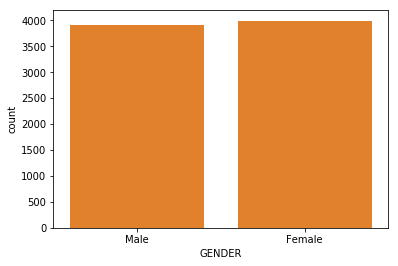

In [14]:
base_color = sns.color_palette()[1]
sns.countplot(data=df_cur, x='GENDER', color=base_color);

This histogram shows the gender distribution of the participents are approx. equal with a slight increase in female students over male students. This will be relevant later when we explore data with 2 or more variables split by gender.

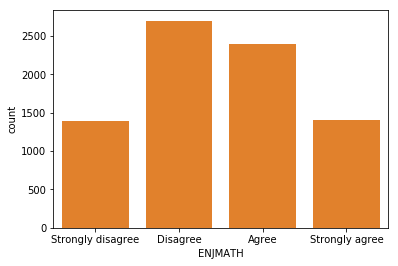

In [15]:
sns.countplot(data=df_cur, x='ENJMATH', order=['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree'], color=base_color);

This histogram shows that in general there is more disagreement than agreement with the statement: "You enjoy mathematics".

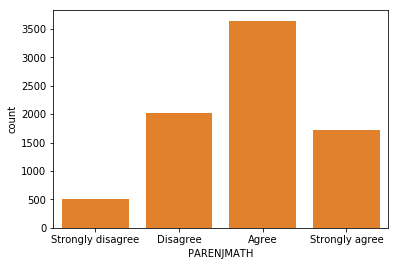

In [16]:
sns.countplot(data=df_cur, x='PARENJMATH', order=['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree'], color=base_color);

But when it came to whether parents enjoy mathematics, the agreement coloumns are overwhelmingly greater than those of disagreement.

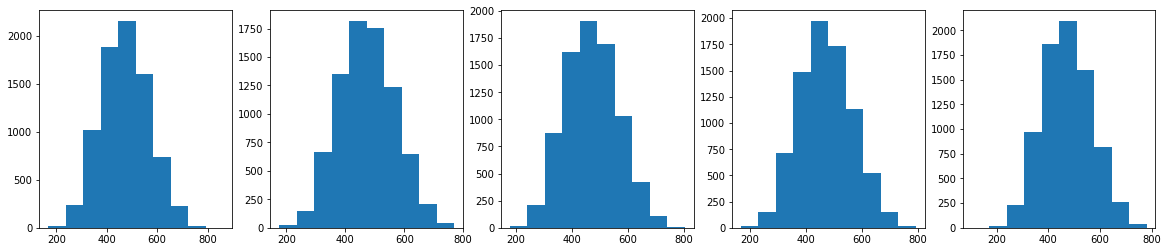

In [17]:
plt.figure(figsize=[20,4])

plt.subplot(1, 5, 1)
plt.hist(data=df_cur, x='PV1MATH');

plt.subplot(1, 5, 2)
plt.hist(data=df_cur, x='PV2MATH');

plt.subplot(1, 5, 3)
plt.hist(data=df_cur, x='PV3MATH');

plt.subplot(1, 5, 4)
plt.hist(data=df_cur, x='PV4MATH');

plt.subplot(1, 5, 5)
plt.hist(data=df_cur, x='PV5MATH');

These five histograms of the plausible values of mathematical literacy show normal distributions, which is to be expected given the definition of plausible values. The interesting part that cannot be seen in these graphs but we can check from the desciption table above is that all these five normal distributions have the same mean and standerd deviation at 472.51 and 94.38 respectively. Thus, we will only use one of the pausible values as we explore data bivariately and multivariately since all five plausible values will yeild the same outcome in terms of comparison with other data.

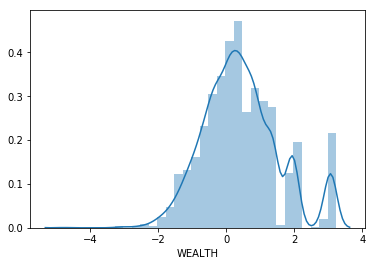

In [19]:
bin_edges = np.arange(df_cur.WEALTH.min(), df_cur.WEALTH.max()+0.25, 0.25);
sns.distplot(df_cur['WEALTH'], bins=bin_edges);

The wealth distribution of the students seems to be a multimodel distribution or a bimodel distribution if you consider the occurences on the far right to be outliers representing a rich minority. No matter what this distribution of wealth shows the fact, unrelated to mathematical litracy, that is there is a major wealth gap between the top and the rest of the 75% of the bottom.

###### Bivariate Exploration of Data

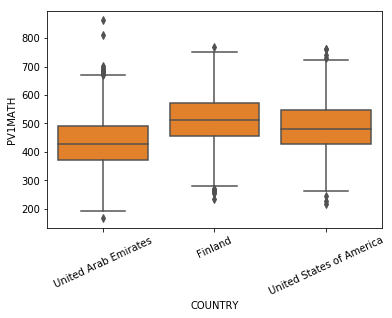

In [20]:
sns.boxplot(data=df_cur, x='COUNTRY', y='PV1MATH', color=base_color);
plt.xticks(rotation=25);

Firstly, as we mentioned before that since we are exploring the variance of the mathematical literacy based on the countries of interest we will use only the first plausible values of mathematical literacy since it will yeild the same information as the rest. Secondly, we can observe here that students' mathematical literacy is highest in Finland with a slight increase than that of the United States, and United Arab Emarites place the lowest between the three countries. This a good observaion specially if we complemented with observations of other variables split into countries like ENJMATH and PARENJMATH. 

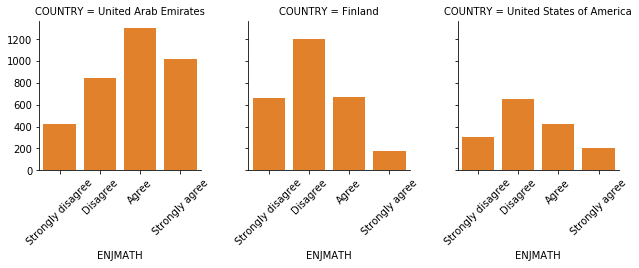

In [21]:
g = sns.FacetGrid(data=df_cur, col='COUNTRY');
g.map(sns.countplot, 'ENJMATH', order=['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree'], color=base_color);
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

We observe an unexpected outcome in these countplots of students enjoying maths split into out countries of interest. Although, countries ranked as Finland highest, then USA, and UAE lowest at the mathematical literacy. UAE is the only country that shows higher agreement of students enjoting mathematics. This leads us to a dead end in connecting the mathematics enjoyment variable with that of mathematical literacy.

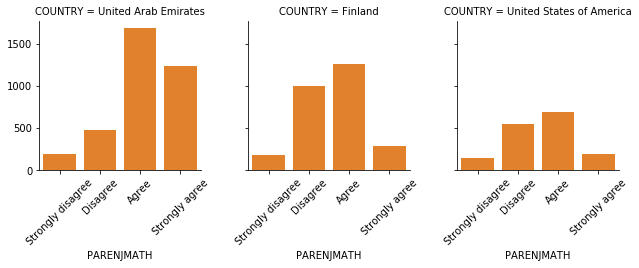

In [22]:
g = sns.FacetGrid(data=df_cur, col='COUNTRY');
g.map(sns.countplot, 'PARENJMATH', order=['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree'], color=base_color);
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

As for the parents enjoying mathematics, we can see that parents in all countries show more agreement than disagreement, which is expected and could be explained as parents are supportive for their children in their mathematical education.

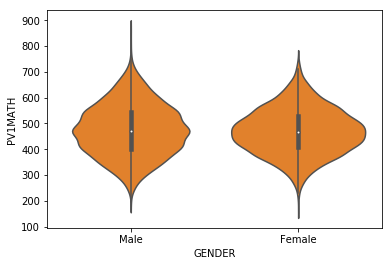

In [23]:
sns.violinplot(data=df_cur, x='GENDER', y='PV1MATH', color=base_color);

The variance of mathematical literacy grouped by gender shows no sign of favoring one side over the other. Thus, gender doesn't seem to be a factor in the change in mathematical literacy.

###### Multivariate Exploration of Data

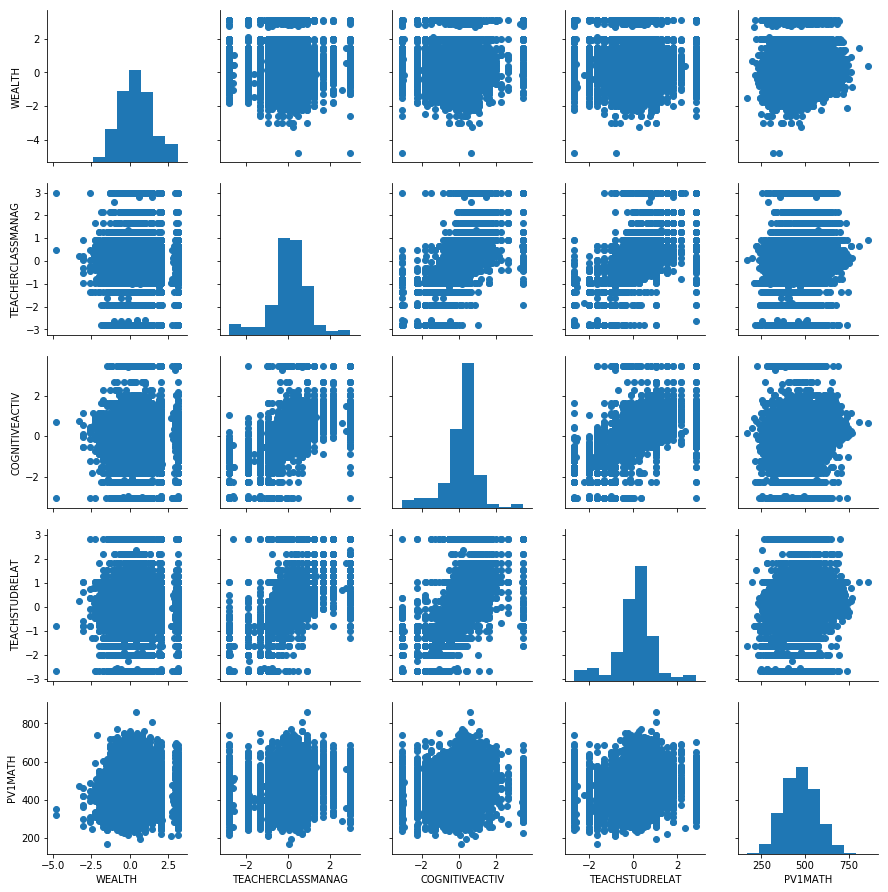

In [25]:
g = sns.PairGrid(data = df_cur, vars = ['WEALTH', 'TEACHERCLASSMANAG', 'COGNITIVEACTIV', 'TEACHSTUDRELAT', 'PV1MATH'])
g.map_diag(plt.hist);
g.map_offdiag(plt.scatter);

This scatter matrix is a good way to observe all the relationship of the left unexplored variables of our dataset. The strongest relationships we can observe are the teacher management of a class, the teacher-student relationship, and the cognitive activation of the student in a class. These three variables show strong positive relationship to each other. We can explore them closer in bivariate scatter plots below.

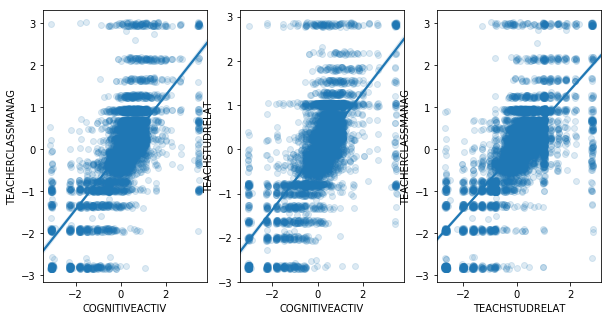

In [27]:
plt.figure(figsize=[10,5])

plt.subplot(1,3,1)
sns.regplot(data=df_cur, y='TEACHERCLASSMANAG', x='COGNITIVEACTIV', fit_reg = True,
           x_jitter = 0.05, y_jitter = 0.05, scatter_kws = {'alpha' : 0.15});
plt.subplot(1,3,2)
sns.regplot(data=df_cur, y='TEACHSTUDRELAT', x='COGNITIVEACTIV', fit_reg = True,
           x_jitter = 0.05, y_jitter = 0.05, scatter_kws = {'alpha' : 0.15});
plt.subplot(1,3,3)
sns.regplot(data=df_cur, y='TEACHERCLASSMANAG', x='TEACHSTUDRELAT', fit_reg = True,
           x_jitter = 0.05, y_jitter = 0.05, scatter_kws = {'alpha' : 0.15});

As we can see from the fitted lines, our observation is further supported here. Since these relationships exists it could be interesting to view how all three variables interact with each other in one graph.

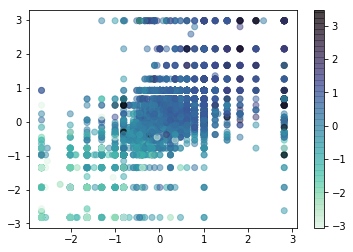

In [28]:
plt.scatter(data=df_cur, x='TEACHSTUDRELAT', y='TEACHERCLASSMANAG', c='COGNITIVEACTIV', cmap = 'mako_r', alpha= 0.5);
plt.colorbar();

This graph adds more interesting view of how all three variables are related to one another. First, we see that if both teacher-student relation and teacher class management are low, then we get a low cognitive activation of students in the class; and vice versa shows to be true, as in if the first two are high, then a high cognitive activation of students is observed. However, if one of the teacher-student relation and teacher class management is high and the other low, then we cannot determine with confidence a high or low cognitive activation of students.

Since a strong relationship exists, it would be wise to plot a scatter plot between cognitive activation of students and their mathematical literacy. If a positive relationship is found, then we can recommend a good teacher-student relation and teacher class management in order for a high cognitive activation of students that leads to a higher mathematical literacy of students.

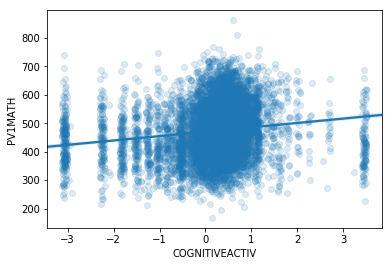

In [29]:
sns.regplot(data=df_cur, y='PV1MATH', x='COGNITIVEACTIV', fit_reg = True,
           x_jitter = 0.05, y_jitter = 0.05, scatter_kws = {'alpha' : 0.15});

And indeed we see a positive relationship between these two key variables.

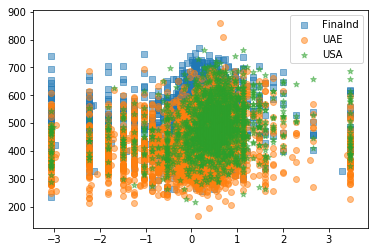

In [30]:
country_markers = [['Finland', 's'],
                   ['United Arab Emirates', 'o'],
                  ['United States of America', '*']]

for country, marker in country_markers:
    df_prop = df_cur[df_cur['COUNTRY'] == country]
    plt.scatter(data = df_prop, x = 'COGNITIVEACTIV', y = 'PV1MATH', marker = marker, alpha=0.5)
plt.legend(['Finalnd', 'UAE','USA']);

This graph shows the relationship between cognitive activation of students and mathematical literacy of students grouped by countries. The expectation is to see the same trend in the box plot of the countries and plausible values of mathematical literacy, where Finland is highest,the USA, and UAE is lowest. The same trend can be seen in the above graph as well. Finland students' cognitive activation shows highest mathematical literacy, then USA, and UAE lowest mathematical literacy. However, all three countries still show a positive relationship between the two variables.

In [31]:
df_USA = df_cur.query('COUNTRY == "United States of America"')
df_UAE = df_cur.query('COUNTRY == "United Arab Emirates"')
df_FIN = df_cur.query('COUNTRY == "Finland"')

In [32]:
ct_counts_USA = df_USA.groupby(['ENJMATH', 'PARENJMATH']).size()
ct_counts_USA = ct_counts_USA.reset_index(name = 'count')
ct_counts_USA = ct_counts_USA.pivot(index = 'PARENJMATH', columns = 'ENJMATH', values = 'count')
ct_counts_USA = ct_counts_USA[['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']]
ct_counts_USA = ct_counts_USA.reindex(['Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'])

In [33]:
ct_counts_UAE = df_UAE.groupby(['ENJMATH', 'PARENJMATH']).size()
ct_counts_UAE = ct_counts_UAE.reset_index(name = 'count')
ct_counts_UAE = ct_counts_UAE.pivot(index = 'PARENJMATH', columns = 'ENJMATH', values = 'count')
ct_counts_UAE = ct_counts_UAE[['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']]
ct_counts_UAE = ct_counts_UAE.reindex(['Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'])

In [34]:
ct_counts_FIN = df_FIN.groupby(['ENJMATH', 'PARENJMATH']).size()
ct_counts_FIN = ct_counts_FIN.reset_index(name = 'count')
ct_counts_FIN = ct_counts_FIN.pivot(index = 'PARENJMATH', columns = 'ENJMATH', values = 'count')
ct_counts_FIN = ct_counts_FIN[['Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']]
ct_counts_FIN = ct_counts_FIN.reindex(['Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'])

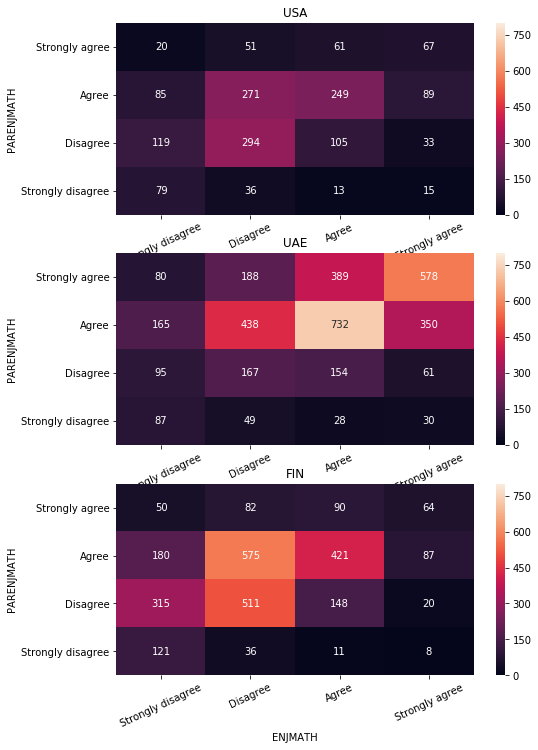

In [35]:
plt.figure(figsize=[8,12])

plt.subplot(3,1,1);
plt.xticks(rotation = 25);
plt.title('USA');
sns.heatmap(ct_counts_USA, annot = True, fmt = 'd', vmin=0, vmax=800);

plt.subplot(3,1,2);
plt.xticks(rotation = 25);
plt.title('UAE');
sns.heatmap(ct_counts_UAE, annot = True, fmt = 'd', vmin=0, vmax=800);

plt.subplot(3,1,3);
plt.xticks(rotation = 25);
plt.title('FIN');
sns.heatmap(ct_counts_FIN, annot = True, fmt = 'd', vmin=0, vmax=800);

Lastly, the above heatmaps was an attempt on viewing a potential relationship that we observed in the countplots in the bivariate exploration of the ENJMATH and PARENJMATH variables. However, the only thing observed is that UAE is the only country that has a positive relationship between the two. This is not relevant to the story line that will be used in our explanatory part of our report.

In [39]:
#write our curated dataframe in order to reuse it in our explanatory part of the report
df_cur.to_csv('PISA2012_curated.csv', index=False);